## NASA - Nearest Earth Objects
#### A cumulative data for Nearest Earth Objects by NASA



### CONTEXT
There is an infinite number of objects in the outer space. 
Some of them are closer than we think. Even though we might 
think that a distance of 70,000 Km can’t potentially harm us, 
but at an astronomical scale, this is a very small distance 
and can disrupt many natural phenomena. These objects/asteroids 
can thus prove to be harmful. Hence, it is wise to know what is 
surrounding us and what can harm us amongst those. Thus, this 
dataset compiles the list of NASA certified asteroids that are c
lassified as the nearest earth object.


### ABSTRACT OF THE PROBLEM:
Sentry is a highly automated collision monitoring system that continually scans the most current asteroid catalogue for possibilities of future impact with Earth over the next 100 years. So, this concludes whether that object is hazardous for the earth are not.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
neo = pd.read_csv(r"C:\Users\hp\Documents\SEMESTER - 6\Machine Learning(S6)\ML LAB(S6)\neo.csv")
neo#.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


### DATA PREPROCESSING

#### Checking for null values

In [3]:
neo.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

#### Checking the data types of the data set

In [4]:
neo.dtypes

id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body          object
sentry_object            bool
absolute_magnitude    float64
hazardous                bool
dtype: object

#### Changing the bool values into Binary 0 or 1
#### True = 1, False = 0

In [5]:
neo['hazardous'] = neo['hazardous'].astype(int)
print(neo['hazardous'].head())

0    0
1    1
2    0
3    0
4    1
Name: hazardous, dtype: int32


In [6]:
neo.columns

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')

#### Getting unique values for the each column in a dataset 

In [7]:
unique_values = neo.nunique()
print(unique_values)

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
orbiting_body             1
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64


### Oribiting body : Earth
### Sentry_object : False
#### so changing the value into 1

In [8]:
neo['sentry_object'] = neo['sentry_object'].astype(int)
print(neo['sentry_object'].head())

0    0
1    0
2    0
3    0
4    0
Name: sentry_object, dtype: int32


In [10]:
def my_func(row):
    if row['orbiting_body'] == 'Earth':
        val = 1
    else:
        val = 0
    return val

neo['orbiting_body'] = neo.apply(my_func,axis=1)
neo['orbiting_body'].head()

0    1
1    1
2    1
3    1
4    1
Name: orbiting_body, dtype: int64

In [11]:
# Checking for the data types
neo.dtypes

id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body           int64
sentry_object           int32
absolute_magnitude    float64
hazardous               int32
dtype: object

### Multiple Linear Regression
We use Multiple linear regression model to estimate the relationship 
between a quantitative dependent variable ['hazardous'] and 
independent variables 
['est_diameter_min', 'est_diameter_max', 'relative_velocity',
'miss_distance', 'orbiting_body', 'sentry_object', 'absolute_magnitude']
using a straight line.

In [12]:
X = neo.iloc[:, 2:9]
y = neo['hazardous']

In [13]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("X train shape:", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape", y_test.shape)

X train shape: (72668, 7)
y_train shape (72668,)
X_test shape: (18168, 7)
y_test shape (18168,)


In [14]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Regression co-efficient:", regressor.coef_)
print()
print("Regressor intercept:", regressor.intercept_)
print()
y_pred = regressor.predict(X_test)
print("Predicted values:", y_pred)
print()
print("Actual values:", y_test.values)

Regression co-efficient: [-5.47944420e-03 -1.22524097e-02  1.09415840e-06 -1.06609069e-09
  0.00000000e+00  0.00000000e+00 -3.78551484e-02]

Regressor intercept: 0.9786120177387115

Predicted values: [-0.01736984  0.22216823 -0.06206746 ...  0.0639019   0.15108669
  0.0981872 ]

Actual values: [0 1 0 ... 0 0 0]


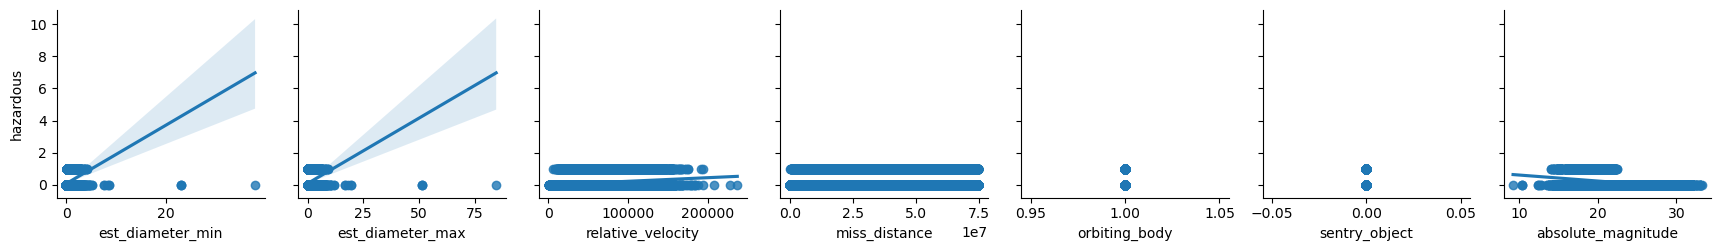

In [17]:
sns.pairplot(neo, x_vars = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'orbiting_body', 
                            'sentry_object', 'absolute_magnitude'], y_vars='hazardous', kind = 'reg')

The argument kind='reg' adds a linear regression line to each scatter 
plot, allowing us to visualize the relationship between the independent
and dependent variables.

#### Dimensionality Reduction

In [18]:
import statsmodels.regression.linear_model as sm
# add a column of ones as integer data type
X = np.append(arr = np.ones((90836  , 1)).astype(int), 
              values = X, axis = 1)
# choose a Significance level usually 0.05, if p>0.05
#  for the highest values parameter, remove that value
X_opt = X[:, [0, 3, 4, 5]]

In [19]:
ols = sm.OLS(endog = y, exog = X_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              hazardous   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1746.
Date:                Sun, 21 May 2023   Prob (F-statistic):               0.00
Time:                        15:32:42   Log-Likelihood:                -16714.
No. Observations:               90836   AIC:                         3.343e+04
Df Residuals:                   90833   BIC:                         3.346e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0017      0.001     -1.462      0.144      -0.004       0.001
x1          2.327e-06   4.04e-08     57.639      0.000    2.25e-06    2.41e-06
x2         -3.007e-10   4.57e-11     -6.581      0.000    -3.9e-10   -2.11e-10
x3            -0.0017      0.001     -1.462      0.144      -0.004       0.001
==============================================================================
Omnibus:                    45080.856   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           195976.752
Skew:                           2.570   Prob(JB):                         0.00
Kurtosis:                       8.036   Cond. No.                     1.57e+24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.92e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

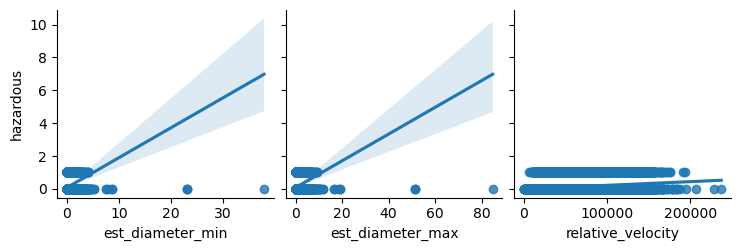

In [20]:
sns.pairplot(neo, x_vars = ['est_diameter_min', 'est_diameter_max', 'relative_velocity'], y_vars='hazardous', kind = 'reg')

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:", logreg.score(X_test, y_test))

Accuracy: 0.9011999119330691


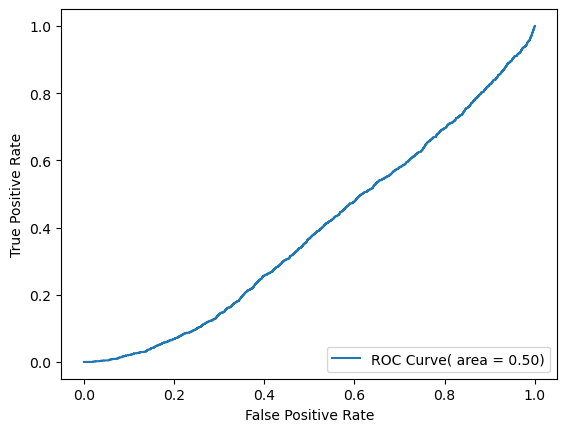

In [23]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label = 'ROC Curve( area = %0.2f)' %roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

ROC curve and AUC provided a useful way to evaluate and compare the 
performance of binary classification of the model.

### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8934390136503743


### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy)

Accuracy: 0.8934390136503743


### Naive Baye's

In [26]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.895695728753853


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     16373
           1       0.28      0.04      0.06      1795

    accuracy                           0.90     18168
   macro avg       0.59      0.51      0.50     18168
weighted avg       0.84      0.90      0.86     18168

Confusion Matrix:
 [[16208   165]
 [ 1730    65]]


<Axes: >

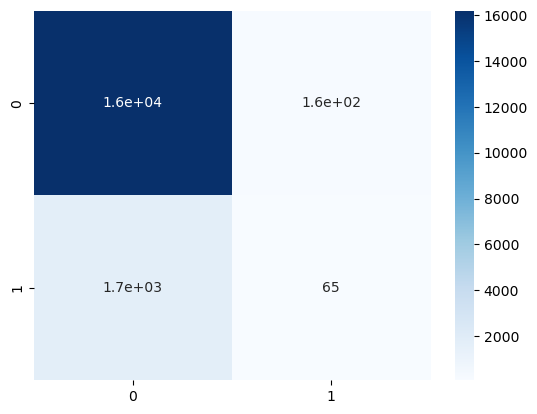

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'Blues')

### K- Nearest Neighbours(KNN)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
kclassifier = KNeighborsClassifier(n_neighbors = 251)
kclassifier.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=251)

In [29]:
kpredict = kclassifier.predict(X_test)

<Axes: >

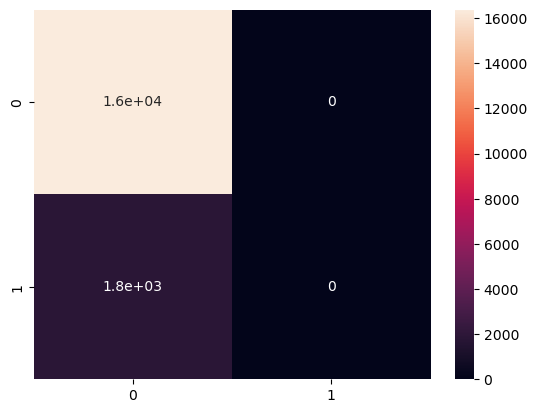

In [30]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,kpredict)
sns.heatmap(cm,annot=True)

In [31]:
print(classification_report(y_test,kpredict))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     16373
           1       0.00      0.00      0.00      1795

    accuracy                           0.90     18168
   macro avg       0.45      0.50      0.47     18168
weighted avg       0.81      0.90      0.85     18168



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Support Vector Machine

from sklearn.svm import SVC
svm = SVC(kernel ='linear', C = 1.0, random_state = 0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)